In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Position_Salaries.csv')

In [4]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 240.0+ bytes


In [3]:
X = df.iloc[:,1:2].values
y = df.iloc[:,-1].values

#### Fitting SVR to dataset

In [13]:
from sklearn.svm import SVR

In [16]:
reg = SVR(gamma='auto', kernel='rbf')   #using default kernel='rbf'  -- gaussian kernel
reg.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### Predicting a new result

In [19]:
y_pred = reg.predict([[6.5]])
y_pred

array([130001.55760156])

#### Visualising SVR results

Text(0, 0.5, 'Salary')

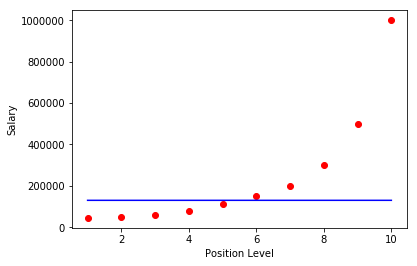

In [20]:
plt.scatter(X,y,c='r')
plt.plot(X,reg.predict(X),c='b')
plt.title = 'SVR'
plt.xlabel('Position Level')
plt.ylabel('Salary')

Here the plot is inaccurate as we have not included feature scalling and SVR doesnt do auto feature scalling

#### Feature scalling

In [4]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = y.reshape(len(y),1)
y = sc_y.fit_transform(y)
y = y.ravel()

c:\users\raj\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\raj\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\raj\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\raj\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [11]:
y

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

In [14]:
reg = SVR(gamma='auto', kernel='rbf')   #using default kernel='rbf'  -- gaussian kernel
reg.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
y_pred = sc_y.inverse_transform(reg.predict(sc_X.transform([[6.5]])))
y_pred

array([170370.0204065])

Text(0, 0.5, 'Salary')

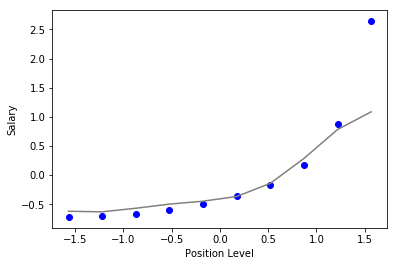

In [25]:
X_grid = np.arange(min(X),max(X))
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X,y,c='b')
plt.plot(X,reg.predict(X),c='grey')
plt.title = 'SVR'
plt.xlabel('Position Level')
plt.ylabel('Salary')